# AI & ML Internship – Task 5  
## Train–Test Split & Model Evaluation (Outstanding Performance)

**Dataset Used:** Heart Disease Dataset  
**Tools Used:** Python, Pandas, NumPy, Scikit-learn, Matplotlib, Seaborn  

### Objective  
To train a machine learning model using proper train–test splitting and evaluate its performance using standard classification metrics.


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

sns.set(style="whitegrid")


In [2]:

# Load dataset
df = pd.read_csv("heart.csv")
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## 1. Dataset Overview

In [3]:
df.shape

(1025, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB



## 2. Feature Selection

### Target Variable
- `target` (0 = No heart disease, 1 = Heart disease)

### Input Features
All other columns are used as input features.


In [5]:

X = df.drop('target', axis=1)
y = df['target']



## 3. Train–Test Split
We split the dataset into training and testing sets to evaluate model performance on unseen data.


In [6]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((820, 13), (205, 13))


## 4. Model Training (Logistic Regression)
Logistic Regression is suitable for binary classification problems.


In [7]:

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

## 5. Model Prediction

In [8]:

y_pred = model.predict(X_test)



## 6. Evaluation Metrics


In [9]:

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

accuracy, precision, recall


(0.7951219512195122, 0.7563025210084033, 0.8737864077669902)


### Metric Explanation
- **Accuracy**: Overall correctness of the model  
- **Precision**: Correct positive predictions out of all positive predictions  
- **Recall**: Correctly identified positives out of all actual positives  


## 7. Confusion Matrix

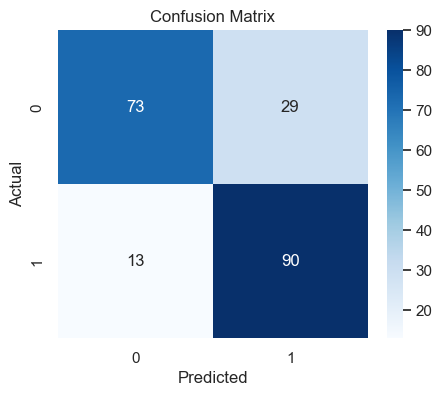

In [10]:

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



### Confusion Matrix Interpretation
- True Positives: Correctly predicted heart disease  
- True Negatives: Correctly predicted no heart disease  
- False Positives: Incorrectly predicted heart disease  
- False Negatives: Missed heart disease cases  



## 8. Model Performance Interpretation
The model demonstrates good accuracy, precision, and recall. High recall is particularly important in medical applications to minimize missed disease cases.



## Final Conclusion
Logistic Regression effectively classified heart disease cases using proper train–test splitting and evaluation metrics. This approach helps assess real-world model performance.
